# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. The original dataset is prepared by [Prajna Bhandary](https://www.linkedin.com/in/prajna-bhandary-0b03a416a/) and available at [Github](https://github.com/prajnasb/observations/tree/master/experiements/data)

![dataset.png](attachment:dataset.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing
![pre.png](attachment:pre.png)

In [ ]:
import cv2,os

data_path='/content/drive/MyDrive/Work/experiements/data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/20
31/31 [==============================] - 68s 2s/step - loss: 0.8313 - accuracy: 0.4972 - val_loss: 0.6928 - val_accuracy: 0.5847
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 66s 2s/step - loss: 0.6870 - accuracy: 0.5978 - val_loss: 0.5767 - val_accuracy: 0.7581
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 69s 2s/step - loss: 0.5545 - accuracy: 0.7195 - val_loss: 0.3993 - val_accuracy: 0.8347
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 66s 2s/step - loss: 0.4562 - accuracy: 0.7694 - val_loss: 0.2909 - val_accuracy: 0.8710
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 66s 2s/step - loss: 0.2537 - accuracy: 0.9016 - val_loss: 0.2027 - val_accuracy: 0.9315
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20

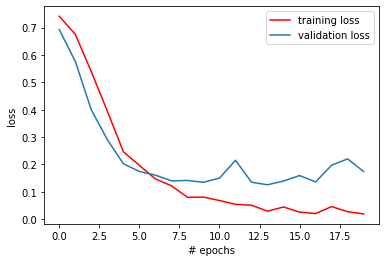

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

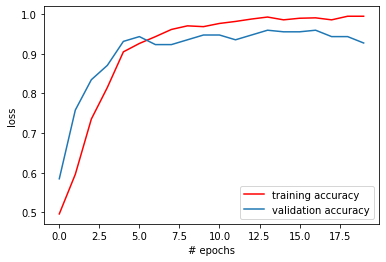

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('/content/model-014.model')

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np

def init_camera():
  """Create objects and functions in HTML/JavaScript to access local web camera"""

  js = Javascript('''

    // global variables to use in both functions
    var div = null;
    var video = null;   // <video> to display stream from local webcam
    var stream = null;  // stream from local webcam
    var canvas = null;  // <canvas> for single frame from <video> and convert frame to JPG
    var img = null;     // <img> to display JPG after processing with `cv2`

    async function initCamera() {
      // place for video (and eventually buttons)
      div = document.createElement('div');
      document.body.appendChild(div);

      // <video> to display video
      video = document.createElement('video');
      video.style.display = 'block';
      div.appendChild(video);

      // get webcam stream and assing to <video>
      stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;

      // start playing stream from webcam in <video>
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // <canvas> for frame from <video>
      canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      //div.appendChild(input_canvas); // there is no need to display to get image (but you can display it for test)

      // <img> for image after processing with `cv2`
      img = document.createElement('img');
      img.width = video.videoWidth;
      img.height = video.videoHeight;
      div.appendChild(img);
    }

    async function takeImage(quality) {
      // draw frame from <video> on <canvas>
      canvas.getContext('2d').drawImage(video, 0, 0);

      // stop webcam stream
      //stream.getVideoTracks()[0].stop();

      // get data from <canvas> as JPG image decoded base64 and with header "data:image/jpg;base64,"
      return canvas.toDataURL('image/jpeg', quality);
      //return canvas.toDataURL('image/png', quality);
    }

    async function showImage(image) {
      // it needs string "data:image/jpg;base64,JPG-DATA-ENCODED-BASE64"
      // it will replace previous image in `<img src="">`
      img.src = image;
      // TODO: create <img> if doesn't exists, 
      // TODO: use `id` to use different `<img>` for different image - like `name` in `cv2.imshow(name, image)`
    }

  ''')

  display(js)
  eval_js('initCamera()')

def take_frame(quality=0.8):
  """Get frame from web camera"""

  data = eval_js('takeImage({})'.format(quality))  # run JavaScript code to get image (JPG as string base64) from <canvas>

  header, data = data.split(',')  # split header ("data:image/jpg;base64,") and base64 data (JPG)
  data = b64decode(data)  # decode base64
  data = np.frombuffer(data, dtype=np.uint8)  # create numpy array with JPG data

  img = cv2.imdecode(data, cv2.IMREAD_UNCHANGED)  # uncompress JPG data to array of pixels

  return img

def show_frame(img, quality=0.8):
  """Put frame as <img src="data:image/jpg;base64,...."> """

  ret, data = cv2.imencode('.jpg', img)  # compress array of pixels to JPG data

  data = b64encode(data)  # encode base64
  data = data.decode()  # convert bytes to string
  data = 'data:image/jpg;base64,' + data  # join header ("data:image/jpg;base64,") and base64 data (JPG)

  eval_js('showImage("{}")'.format(data))  # run JavaScript code to put image (JPG as string base64) in <img>
                                           # argument in `showImage` needs `" "` 

In [ ]:
import cv2
import os

face_cascade = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, '/content/drive/MyDrive/Work/face-mask-detection-keras-master/haarcascade_frontalface_default.xml'))

In [ ]:
labels_dict={1:'MASK',0:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
 
init_camera()

while True:
    try:
        img = take_frame()

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #cv2_imshow(gray)  # it creates new image for every frame (it doesn't replace previous image) so it is useless
        #show_frame(gray)  # it replace previous image

        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
                  face_img=gray[y:y+w,x:x+w]
                  resized=cv2.resize(face_img,(100,100))
                  normalized=resized/255.0
                  reshaped=np.reshape(normalized,(1,100,100,1))
                  result=model.predict(reshaped)

                  label=np.argmax(result,axis=1)[0]
                
                  cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
                  cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
                  cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        #cv2_imshow(img)  # it creates new image for every frame (it doesn't replace previous image) so it is useless
        show_frame(img)  # it replace previous image
        
    except Exception as err:
        print('Exception:', err)

<IPython.core.display.Javascript object>